## 0. General Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data preparation

### 1.1 Producer prices
#### 1.1.1 Data Description

The FAO Database offers a variety of datasets containing information about the consumer/producer prices of every country for all years between 1970 and 2018.
##### Producer prices -annual
<details>
  <summary>Description</summary> 
  This sub-domain contains data on Agriculture Producer Prices. These are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Annual data are provided from 1991 for over 160 countries and about 200 commodities.
</details>

<details>
  <summary>Path</summary>
  
  Data/FAOSTAT/Prices_E_All_Data_(Normalized).zip
</details>

##### Exchange rates -annual
<details>
  <summary>Description</summary>  
  Annual exchange rates, national currency units per U.S. dollar.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Exchange_rate_E_All_Data_(Normalized).zip
</details>

##### Producer prices -monthly
<details>
  <summary>Description</summary>  
  This sub-domain contains data on Agriculture Producer Prices (APP). These are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Monthly data are provided from January 2010 to December of the previous year for over 60 countries and about 200 commodities.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Prices_Monthly_E_All_Data_(Normalized).zip
</details>

##### Producer prices indices -annual
<details>
  <summary>Description</summary>  
  Indices of agricultural producer prices that measure the average annual change over time in the selling prices received by farmers (prices at the farm-gate or at the first point of sale). Annual data are provided for over 80 countries. The three categories of producer price indices available in FAOSTAT comprise: Single-item price indices, Commodity group indices and the Agriculture producer price index.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Price_Indices_E_All_Data_(Normalized).zip
</details>

##### Producer prices -archive
<details>
  <summary>Description</summary>  
  This sub-domain contains data on Agriculture Producer Prices from 1966 to 1990. These are prices received by farmers for primary crops, live animals weight and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Data are provided for over 97 countries and for some 200 commodities.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/PricesArchive_E_All_Data_(Normalized).zip
</details>

##### Consumer prices indices 
<details>
  <summary>Description</summary>  
  The FAOSTAT monthly CPI Food CPI database was based on the ILO CPI data until December 2014. In 2014, IMF-ILO-FAO agreed to transfer global CPI data compilation from ILO to IMF. Upon agreement, CPIs for all items and its sub components originates from the International Monetary Fund (IMF), and the UN Statistics Division(UNSD) for countries not covered by the IMF. However, due to a limited time coverage from IMF and UNSD for a number of countries, the Organisation for Economic Co-operation and Development (OECD), the Latin America and the Caribbean statistics (CEPALSTAT), Central Bank of Western African States (BCEAO), Eastern Caribbean Central Bank (ECCB) and national statistical office website data are used for missing historical data from IMF and UNSD food CPI. The FAO CPI dataset for all items(or general CPI) and the Food CPI, consists of a complete and consistent set of time series from January 2000 onwards. These indices measure the price change between the current and reference periods of the average basket of goods and services purchased by households. The CPI,all items is typically used to measure and monitor inflation, set monetary policy targets, index social benefits such as pensions and unemployment benefits, and to escalate thresholds and credits in the income tax systems and wages in public and private wage contracts.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/ConsumerPriceIndices_E_All_Data_(Normalized).zip
</details>

##### Deflators 
<details>
  <summary>Description</summary>  
  The FAOSTAT Deflators database provides the following selection of implicit price deflator series by country: Gross Domestic Product (GDP) deflator, Gross Fixed Capital Formation (GFCF) deflator, Agriculture, Forestry, Fishery Value-Added (VA_AFF) deflator, andManufacturing Valued-Added (VA_MAN) deflator. A deflator is a figure expressing the change in prices over a period of time for a product or a basket of products by comparing a reference period to a base period. It is obtained by dividing a current price value of a given aggregate by its real counterpart. When calculated from the major national accounting aggregates such as GDP or agriculture VA, implicit price deflators pertains to wider ranges of goods and services in the economy than that represented by any of the individual price indexes (such as CPIs, PPIs). Movements in an implicit price deflator reflect both changes in price and changes in the composition of the aggregate for which the deflator is calculated. In the FAOSTAT Deflators database, all series are derived from the United Nations Statistics Division (UNSD) National Accounts Estimates of Main Aggregates database (UNSD NAE). In particular, the implicit GDP deflator, the implicit GFCF deflator and the implicit value added deflator in Agriculture, Forestry, Fishery are obtained by dividing the series in current prices by those in constant 2010 prices (base year).
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Deflators_E_All_Data_(Normalized).zip
</details>

We are for now interested on the revenue that goes to local producers and their evolutions. We have producer prices -archive and producer prices -annual that will help us for having these values. Combining these two datasets will give us producer prices 1966 to 2018.
Since prices can be in different units we need the Exchange rates dataset to convert local prices into a standard unit.
We do not need Producer prices monthly because the exchange rates are annual.

#### 1.1.2 Data Cleaning

In [2]:
''' Load the data'''
prices_annual = pd.read_csv('Data/FAOSTAT/Prices_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')
prices_arch = pd.read_csv('Data/FAOSTAT/PricesArchive_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')
exchange_rates = pd.read_csv('Data/FAOSTAT/Exchange_rate_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')

In [3]:
prices_annual.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1993,1993,LCU,46000.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1994,1994,LCU,50000.0,NaN
2,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1995,1995,LCU,62000.0,NaN
3,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1996,1996,LCU,50000.0,NaN
4,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1997,1997,LCU,41000.0,NaN


In [4]:
prices_arch.head()

,CountryCode,Country,ItemCode,Item,ElementGroup,ElementCode,Element,Year,Unit,Value,Flag
0,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1966,LCU,1150.0,F
1,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1967,LCU,1140.0,F
2,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1968,LCU,1210.0,F
3,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1969,LCU,1200.0,F
4,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1970,LCU,1200.0,F


In [5]:
exchange_rates.head()

,Area Code,Area,Item Code,Item,ISO Currency Code,Currency,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1970,1970,NaN,0.045,X,Data from UNSD AMA
1,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1971,1971,NaN,0.045,X,Data from UNSD AMA
2,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1972,1972,NaN,0.045,X,Data from UNSD AMA
3,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1973,1973,NaN,0.045,X,Data from UNSD AMA
4,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1974,1974,NaN,0.045,X,Data from UNSD AMA


##### 1.1.2.1 Exchange rates -annual

In [6]:
exchange_rates.columns = exchange_rates.columns.str.replace(' ', '_')

Want to check if the exchange rates are always from local currency to dollars.

In [7]:
exchange_rates.Item.unique()

array(['Standard local currency units per USD'], dtype=object)

Check if Year_Code and Year are always the same 

In [8]:
(exchange_rates.Year_Code - exchange_rates.Year).unique()

array([0])

They seem to be the same -> we can then delete one of the two

In [9]:
exchange_rates.drop(['Year_Code'], axis = 1, inplace = True)

In [10]:
exchange_rates.rename({'Value': 'Rate'}, axis = 1, inplace = True)

In [11]:
"""Select only necessary columns"""
exchange_rates = exchange_rates[['Area_Code', 'Area', 'Year', 'Rate']]
exchange_rates.drop_duplicates()
exchange_rates.head()

,Area_Code,Area,Year,Rate
0,2,Afghanistan,1970,0.045
1,2,Afghanistan,1971,0.045
2,2,Afghanistan,1972,0.045
3,2,Afghanistan,1973,0.045
4,2,Afghanistan,1974,0.045


Finally we want to know if the dataset contain nan values

In [12]:
exchange_rates.isnull().sum()

Area_Code    0
Area         0
Year         0
Rate         0
dtype: int64

Thus `exchange_rates` does not contain any nan values

### Switzerland study

In [13]:
exchange_rates_swiss = exchange_rates.loc[exchange_rates.Area == 'Switzerland']

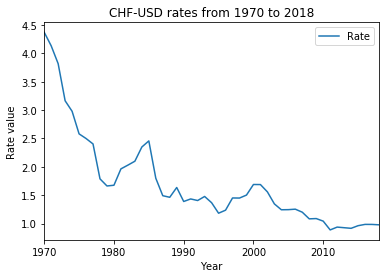

In [14]:
exchange_rates_swiss[['Rate', 'Year']].plot(kind = 'line', x = 'Year', y = 'Rate')
plt.title('CHF-USD rates from 1970 to 2018')
plt.ylabel('Rate value')
plt.show()

When looking at the rates evolution from 1970 to 2018, everything seems to be correct without outliers. High rates are present in the 70's. From 2010 the USD and the CHF are almost equal which is also expected.

#### 2) Producer prices

#### 2.1) Producer prices -annual

In [21]:
prices_annual.columns = prices_annual.columns.str.replace(' ', '_')

In [22]:
''' Checking if the dataframe contains nan values'''
prices_annual.isnull().sum()

Area_Code            0
Area                 0
Item_Code            0
Item                 0
Element_Code         0
Element              0
Year_Code            0
Year                 0
Unit                 0
Value                0
Flag            419455
dtype: int64

Again for this dataset we check if Year_Code and Year are the same

In [25]:
(prices_annual.Year_Code - prices_annual.Year).unique()

array([0])

There are the same so to be consistent with the dataframe `exchange_rates` we keep the Year column

In [26]:
prices_annual.drop(['Year_Code'], axis = 1, inplace = True)

We finally want to know in which units are the prices

### Switzerland study

In [27]:
''' Swizerland case'''
prices_annual_swiss = prices_annual.copy()
prices_annual_swiss = prices_annual.loc[prices_annual.Area == 'Switzerland']

First let's check the different units contain in the switzerland dataset

In [28]:
prices_annual_swiss['Unit'].unique()

array(['LCU', 'SLC', 'USD'], dtype=object)

In [29]:
prices_annual_swiss['Element'].unique()

array(['Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

In [30]:
prices_annual_swiss['Element_Code'].unique()

array([5530, 5531, 5532])

Since three different units appear in the switzerland producer prices -annual dataset, we need to have a standard unit to able to compare values. This is achived by joining `prices_annual_swiss` dataframe with the `exchange_rates` dataframe. The standard unit will be dollars(USD) since the `exchange_rates` dataframe is based on dollars.

In [31]:
''' Prices in USD unit'''
prices_annual_swiss_usd = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'USD']
prices_annual_swiss_usd.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
389937,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1991,USD,684.8,NaN
389938,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1992,USD,342.1,NaN
389939,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1993,USD,457.5,NaN
389940,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1994,USD,452.6,NaN
389941,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1995,USD,643.6,NaN
389942,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1996,USD,442.6,NaN
389943,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1997,USD,501.6,NaN
389944,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1998,USD,324.9,NaN
389945,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1999,USD,438.7,NaN
389946,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),2000,USD,308.5,NaN


In [32]:
''' Prices in LCU (local currency unit) unit'''
prices_annual_swiss_lcu = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'LCU']
prices_annual_swiss_lcu.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
389881,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1991,LCU,982.0,NaN
389882,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1992,LCU,481.0,NaN
389883,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1993,LCU,676.0,NaN
389884,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1994,LCU,619.0,NaN
389885,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1995,LCU,761.0,NaN
389886,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1996,LCU,547.0,NaN
389887,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1997,LCU,728.0,NaN
389888,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1998,LCU,471.0,NaN
389889,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1999,LCU,659.0,NaN
389890,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),2000,LCU,521.0,NaN


In [33]:
''' Prices in SLC (standard local currency) unit'''
prices_annual_swiss_slc = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'SLC']
prices_annual_swiss_slc.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
389909,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1991,SLC,982.0,NaN
389910,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1992,SLC,481.0,NaN
389911,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1993,SLC,676.0,NaN
389912,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1994,SLC,619.0,NaN
389913,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1995,SLC,761.0,NaN
389914,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1996,SLC,547.0,NaN
389915,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1997,SLC,728.0,NaN
389916,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1998,SLC,471.0,NaN
389917,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1999,SLC,659.0,NaN
389918,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),2000,SLC,521.0,NaN


The length of the prices with USD, SLC and LCU are the same. We can think that prices are reproduced three times in the switzerland dataset.
To be sure let transform SLC and LCU unit into USD unit.

In [34]:
''' 
Check if datasets containg LCU and SLC units are the same.
Unit, Element, Element_Code are columns referencing the unit used, we can then work without these columns 
for checking equality.
'''
prices_annual_swiss_slc.loc[prices_annual_swiss_slc.Unit == 'LCU'][prices_annual_swiss_slc.columns.difference(['Unit', 'Element', 'Element_Code'])].equals(prices_annual_swiss_lcu.loc[prices_annual_swiss_lcu.Unit == 'SLC'][prices_annual_swiss_lcu.columns.difference(['Unit', 'Element', 'Element_Code'])])

True

The dataset containg with SLC and LCU unit are equals. Thus we only have to transform one of the two dataset into USD unit.

In [35]:
prices_annual_swiss_lcu_usd = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'LCU'].merge(exchange_rates, left_on = ['Area_Code', 'Area', 'Year'], right_on = ['Area_Code', 'Area', 'Year'], suffixes=('', '_to_delete'))
prices_annual_swiss_lcu_usd['Value'] = prices_annual_swiss_lcu_usd['Value'] / prices_annual_swiss_lcu_usd['Rate']
prices_annual_swiss_lcu_usd.drop(columns = ['Rate'], inplace = True)
prices_annual_swiss_lcu_usd['Unit'] = 'USD'
prices_annual_swiss_lcu_usd['Element'] = 'Producer Price (USD/tonne)'
prices_annual_swiss_lcu_usd['Element_Code'] = 5532
prices_annual_swiss_lcu_usd.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
0,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1991,USD,684.797768,NaN
1,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),1991,USD,1377.266388,NaN
2,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),1991,USD,481.171548,NaN
3,211,Switzerland,414,"Beans, green",5532,Producer Price (USD/tonne),1991,USD,942.817294,NaN
4,211,Switzerland,358,Cabbages and other brassicas,5532,Producer Price (USD/tonne),1991,USD,837.517434,NaN
5,211,Switzerland,426,Carrots and turnips,5532,Producer Price (USD/tonne),1991,USD,396.094840,NaN
6,211,Switzerland,393,Cauliflowers and broccoli,5532,Producer Price (USD/tonne),1991,USD,1096.931660,NaN
7,211,Switzerland,531,Cherries,5532,Producer Price (USD/tonne),1991,USD,1769.874477,NaN
8,211,Switzerland,397,Cucumbers and gherkins,5532,Producer Price (USD/tonne),1991,USD,1246.164575,NaN
9,211,Switzerland,1062,"Eggs, hen, in shell",5532,Producer Price (USD/tonne),1991,USD,4062.064156,NaN


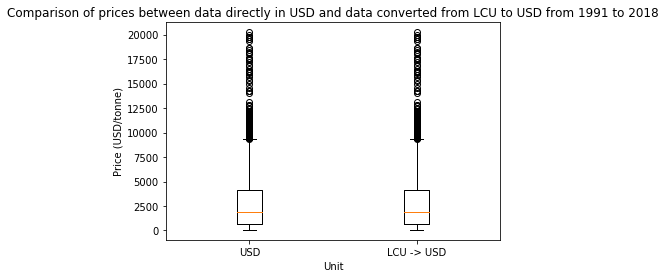

In [36]:
names = ['USD', 'LCU -> USD']
plt.boxplot([prices_annual_swiss_usd['Value'], prices_annual_swiss_lcu_usd['Value']])
plt.xticks([1, 2], names)
plt.title('Comparison of prices between data directly in USD and data converted from LCU to USD from 1991 to 2018')
plt.xlabel('Unit')
plt.ylabel('Price (USD/tonne)')
plt.show()

Distribution seems to be the same, let's check if these two datasets are equal.

In [37]:
prices_annual_swiss_usd.loc[prices_annual_swiss_usd.Unit == 'LCU'][prices_annual_swiss_usd.columns.difference(['Unit', 'Element', 'Element_Code'])].equals(prices_annual_swiss_lcu_usd.loc[prices_annual_swiss_lcu_usd.Unit == 'SLC'][prices_annual_swiss_lcu_usd.columns.difference(['Unit', 'Element', 'Element_Code'])])

True

Thus, we can conclude that for the case of swizerland, data is well organized without any outliers.

#### 2.2) Producer prices -archive

In [38]:
prices_arch = prices_arch.rename(columns = {'CountryCode': 'Area_Code', 
                                            'Country': 'Area',
                                            'ItemCode': 'Item_Code',
                                            'ElementGroup': 'Element_Group',
                                            'ElementCode': 'Element_Code'})

In [39]:
prices_arch['Unit'].unique()

array(['LCU'], dtype=object)

In [40]:
prices_arch['Element'].unique()

array(['Producer Price (LCU/tonne)'], dtype=object)

In [41]:
prices_arch['Element_Code'].unique()

array([5530])

In [42]:
prices_arch['Element_Group'].unique()

array([53])

Element_Group column is only present in prices_arch and has a single value. We can then delete this column.

In [43]:
prices_arch.drop(columns = ['Element_Group'], inplace = True)

`prices_arch` dataframe contains only prices in local currency unit (LCU). Thus, we need to convert everything into our standard format: USD unit.

In [44]:
prices_arch_swiss = prices_arch.loc[prices_arch.Area == 'Switzerland']
prices_arch_swiss.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
119920,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1966,LCU,260.0,F
119921,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1967,LCU,230.0,F
119922,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1968,LCU,230.0,F
119923,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1969,LCU,230.0,F
119924,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1970,LCU,230.0,F
119925,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1971,LCU,260.0,F
119926,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1972,LCU,340.0,F
119927,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1973,LCU,360.0,F
119928,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1974,LCU,400.0,F
119929,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1975,LCU,391.0,NaN


In [47]:
prices_arch_swiss_lcu_usd = prices_arch_swiss.merge(exchange_rates, left_on = ['Area_Code', 'Area', 'Year'], right_on = ['Area_Code', 'Area', 'Year'], suffixes=('', '_to_delete'))
prices_arch_swiss_lcu_usd.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag,Rate
0,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1970,LCU,230.0,F,4.373
1,211,Switzerland,526,Apricots,5530,Producer Price (LCU/tonne),1970,LCU,830.0,F,4.373
2,211,Switzerland,44,Barley,5530,Producer Price (LCU/tonne),1970,LCU,436.0,NaN,4.373
3,211,Switzerland,414,"Beans, green",5530,Producer Price (LCU/tonne),1970,LCU,1351.0,F,4.373
4,211,Switzerland,358,Cabbages and other brassicas,5530,Producer Price (LCU/tonne),1970,LCU,539.0,F,4.373


In [50]:
prices_arch_swiss_lcu_usd['Value'] = prices_arch_swiss_lcu_usd['Value'] / prices_arch_swiss_lcu_usd['Rate']
prices_arch_swiss_lcu_usd.drop(columns = ['Rate', 'Flag'], inplace = True)
prices_arch_swiss_lcu_usd['Unit'] = 'USD'
prices_arch_swiss_lcu_usd['Element'] = 'Producer Price (USD/tonne)'
prices_arch_swiss_lcu_usd['Element_Code'] = 5532
prices_arch_swiss_lcu_usd.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
0,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1970,USD,12.027320
1,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),1970,USD,43.402939
2,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),1970,USD,22.799616
3,211,Switzerland,414,"Beans, green",5532,Producer Price (USD/tonne),1970,USD,70.647434
4,211,Switzerland,358,Cabbages and other brassicas,5532,Producer Price (USD/tonne),1970,USD,28.185764
5,211,Switzerland,426,Carrots and turnips,5532,Producer Price (USD/tonne),1970,USD,32.944399
6,211,Switzerland,945,Cattle Live Weight,5532,Producer Price (USD/tonne),1970,USD,210.844156
7,211,Switzerland,393,Cauliflowers and broccoli,5532,Producer Price (USD/tonne),1970,USD,54.698162
8,211,Switzerland,531,Cherries,5532,Producer Price (USD/tonne),1970,USD,48.632209
9,211,Switzerland,1095,Chicken Live Weight,5532,Producer Price (USD/tonne),1970,USD,133.241793


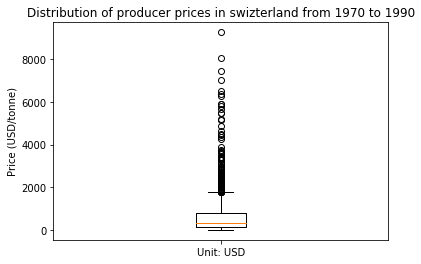

In [51]:
plt.boxplot(prices_arch_swiss_lcu_usd['Value'])
plt.xticks([1], ['Unit: USD'])
plt.title('Distribution of producer prices in swizterland from 1970 to 1990')
plt.ylabel('Price (USD/tonne)')
plt.show()

Producer prices seems to be smaller in `prices_arch_swiss_lcu_usd` dataframe compare to `prices_annual_swiss_lcu_usd` dataframe which is expected since `prices_arch_swiss_lcu_usd` dataset correspond to prices from 1970 to 1996 and  `prices_arch_swiss_lcu_usd` dataset correspond to prices from 1997 to 2018 and we all know that prices increased over the years.

We then have to concatenate `prices_arch_swiss_lcu_usd` and `prices_annual_swiss_lcu_usd` dataframe to have values from 1970 to 2018 in USD in only one dataframe.
We call this new dataframe `producer_prices_swiss`

In [52]:
producer_prices_swiss = pd.concat([prices_arch_swiss_lcu_usd, prices_annual_swiss_lcu_usd], ignore_index=True, sort = False)
producer_prices_swiss.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value,Flag
0,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1970,USD,12.027320,NaN
1,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),1970,USD,43.402939,NaN
2,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),1970,USD,22.799616,NaN
3,211,Switzerland,414,"Beans, green",5532,Producer Price (USD/tonne),1970,USD,70.647434,NaN
4,211,Switzerland,358,Cabbages and other brassicas,5532,Producer Price (USD/tonne),1970,USD,28.185764,NaN
5,211,Switzerland,426,Carrots and turnips,5532,Producer Price (USD/tonne),1970,USD,32.944399,NaN
6,211,Switzerland,945,Cattle Live Weight,5532,Producer Price (USD/tonne),1970,USD,210.844156,NaN
7,211,Switzerland,393,Cauliflowers and broccoli,5532,Producer Price (USD/tonne),1970,USD,54.698162,NaN
8,211,Switzerland,531,Cherries,5532,Producer Price (USD/tonne),1970,USD,48.632209,NaN
9,211,Switzerland,1095,Chicken Live Weight,5532,Producer Price (USD/tonne),1970,USD,133.241793,NaN
